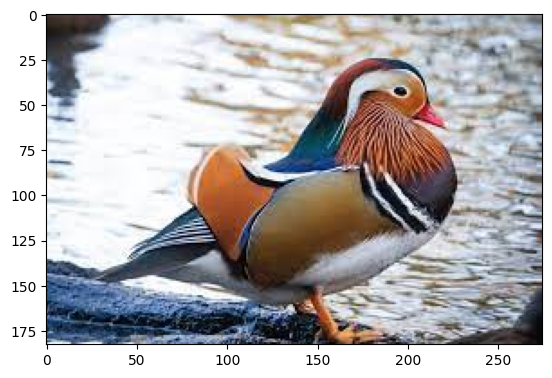

In [63]:
#Install Open CV and give tutorial on getting Jupyter notebook up and running.
# %pip install opencv-contrib-python
# %pip install matplotlib

#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving the image in a variable
img = cv2.imread('images/Duck.jpg')

#OpenCV by defualt uses BGR instead of RGB.  Old digital camera standard.

def convert_BGR(bgr): #Swap B value with R value.
    b = bgr[0][0][0]
    g = bgr[0][0][1]
    r = bgr[0][0][2]

    return np.array([[[r,g,b]]]) 
          

def bgr_to_rgb(img):
    loc = np.zeros((img.shape[0],img.shape[1],img.shape[2]), dtype=np.uint8)

        #For each row in our grid.
    for h in range(0,img.shape[0]): #itarate through pixels using a nested loop, and saving new values in rgb
            #Search each pixel in the row
            for w in range(0,img.shape[1]):
                bgr = np.array([[[img[h,w,0], img[h,w,1], img[h,w,2]]]])
                loc[h,w] = convert_BGR(bgr)
                 
    return loc   

img = bgr_to_rgb(img) #convert image

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(img)

In [64]:
import cv2 
import numpy as np
from numpy import interp

# Convert the RGB to HSV code so it produces values in OpenCv's specified ranges and array structure. Your function should
# accept a 3D array and return HSV values in OpenCv's ranges. H -> [0,180], S -> [0,255], V -> [0,255]

def rgb_to_hsv(rgb):
    
    # Normalize color values.  Convert to floating point values between 0 - 1
    rgb = rgb/255 

    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0

    # Find the max and min RGB values. 
    v = np.max(rgb)
    vMin = np.min(rgb)

    # Set the saturation value.
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    # Calculate (v - vMin) convenience
    diff = (v - vMin)

    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal. 
    if(rgb[0][0][0] == rgb[0][0][1] and rgb[0][0][1] == rgb[0][0][2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0][0][0] == v):
        h = 60 * (rgb[0][0][1] - rgb[0][0][2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[0][0][1] == v):
        h = 120 + 60 * (rgb[0][0][2] - rgb[0][0][0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[0][0][2] == v):
        h = 240 + 60 * (rgb[0][0][0] - rgb[0][0][1]) / diff
    
    h = round(h/2)
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))

    # Return hsv values.
    return np.array([[[h,s,v]]]) 



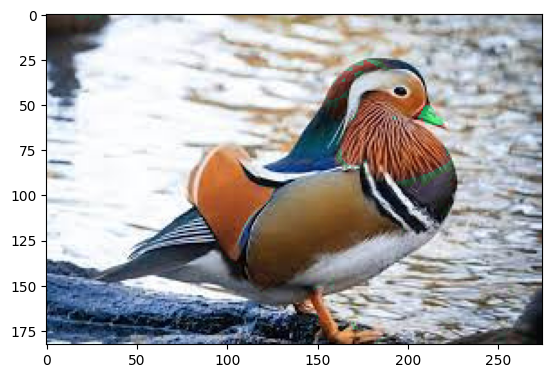

In [65]:
#Threshold filter on our image. 

#Let's copy our image and create a blank image array to store our threshold.

#des = np.zeros((img.shape[0],img.shape[1],img.shape[2]), dtype=np.uint8)


def img_rgb_to_hsv(img):
    des = np.zeros((img.shape[0],img.shape[1],img.shape[2]), dtype=np.uint8)

        #For each row in our grid.
    for y in range(0,img.shape[0]):
            #Search each pixel in the row
            for x in range(0,img.shape[1]):
                # img[y,x,0] - Red img[y,x,1] - Green img[y,x,2] - Blue
                # des[y,x]
                rgb = np.array([[[img[y,x,0], img[y,x,1], img[y,x,2]]]])
                des[y,x] = rgb_to_hsv(rgb)
      
    return des            

#Combine the greyscale and the threshold image so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
# imgTwo = np.concatenate((img, des), axis=1)

#Use matplotlib while using a python notebook. Draw the image.
des = img_rgb_to_hsv(img)
des = cv2.cvtColor(des, cv2.COLOR_HSV2RGB)
plt.imshow(des)
#print(des)

# Create a rgb value.
# rgb = np.array([[[img[y,x,0], img[y,x,1], img[y,x,2]]]]) 

# Call the rgb_to_hsv function.  
# hsv = rgb_to_hsv(rgb)

# print("The original rgb value:", rgb)
# print("Converted to hsv in OpenCv ranges", [[[round(hsv[0][0][0]/2),round(s),round(v)]]])